In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"D:\Jupyter\RESUME PROJECTS\CARS RESALE\car.xlsx")
df

,brand,model,transmission,fuel,price,power,seats
0,19,211,1,0,175000.0,4.080246,5
1,10,58,1,1,1250000.0,4.845761,5
2,9,111,1,4,450000.0,4.496471,5
3,19,76,1,1,600000.0,4.497139,7
4,1,9,0,1,1774000.0,4.954418,5
...,...,...,...,...,...,...,...
21084,10,104,1,4,250000.0,4.234831,5
21085,19,76,1,4,925000.0,4.522875,7
21086,29,157,1,1,425000.0,4.649378,5
21087,18,232,1,1,1225000.0,4.948760,7


In [3]:
# Separate the features (X) and target variable (y)
X = df.drop('price', axis=1)
y = df['price']



In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=53)


In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('intercept:',model.intercept_)
print('coefficients:',model.coef_)

intercept: -4418199.649686039
coefficients: [ 5.44782616e+02 -5.22512747e+02 -4.50197895e+05 -6.11932359e+04
  1.26524868e+06 -3.63376829e+03]


In [6]:
# prediction on train data
ypred_train = model.predict(X_train)

# evaluation on train data
from sklearn.metrics import r2_score
print("train r2:",r2_score(y_train,ypred_train))

#cross validation on train data
from sklearn.model_selection import cross_val_score
print('crossvalidationscore:',cross_val_score(model,X_train,y_train,cv=5).mean())

# predict on test data
ypred_test = model.predict(X_test)

from sklearn.metrics import r2_score
print('testr2:',r2_score(y_test,ypred_test))

train r2: 0.5632681007974439
crossvalidationscore: 0.5628580243246881
testr2: 0.5397105115016093


In [7]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.8,random_state=53)

import statsmodels.formula.api as smf
model1 = smf.ols('y_train~X_train',data=df_train).fit()
model1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     3625.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:24:44   Log-Likelihood:            -2.4682e+05
No. Observations:               16871   AIC:                         4.936e+05
Df Residuals:                   16864   BIC:                         4.937e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.418e+06   7.81e+04    -56.561      0.000   -4.57e+06   -4.27e+06
X_train[0]   544.7826    546.724      0.996      0.319    -526.854    1616.420
X_train[1]  -522.5127     63.506     -8.228      0.000    -646.991    -398.035
X_train[2] -4.502e+05   1.25e+04    -36.154      0.000   -4.75e+05   -4.26e+05
X_train[3] -6.119e+04   3055.467    -20.027      0.000   -6.72e+04   -5.52e+04
X_train[4]  1.265e+06   1.52e+04     83.504      0.000    1.24e+06    1.29e+06
X_train[5] -3633.7683   5858.386     -0.620      0.535   -1.51e+04    7849.281
==============================================================================
Omnibus:                    10109.369   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186500.716
Skew:                           2.536   Prob(JB):                         0.00
Kurtosis:                      18.479   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

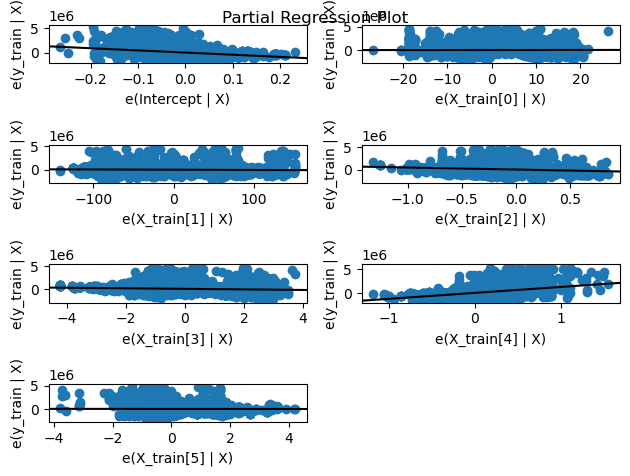

In [8]:
import statsmodels.api as sm
sm.graphics.plot_partregress_grid(model1)
plt.show()

**check for influential records**

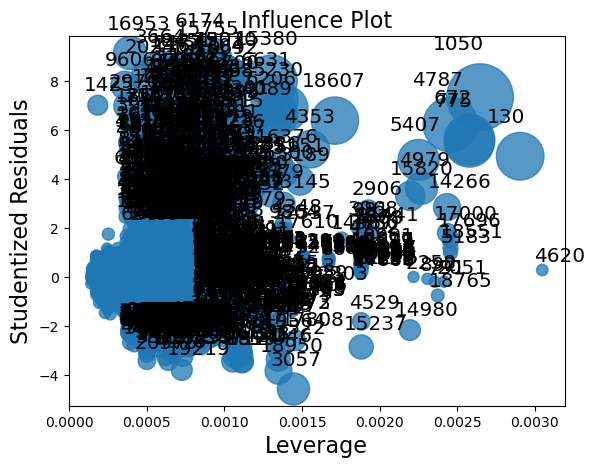

In [9]:
import statsmodels.api as sm
sm.graphics.influence_plot(model1)
plt.show()

In [10]:
# drop newspaper
df.drop(columns=['brand','seats'],inplace=True)

X= df.drop(columns=['price'])
y= df['price']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=53)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
print("intercept",model.intercept_)
print("coeeficients",model.coef_)

ypredict_train = model.predict(X_train)
print('trainr2:',r2_score(y_train,ypred_train))
print('cvscore:',cross_val_score(model,X_train,y_train,cv=5).mean())

ypred_test = model.predict(X_test)
print('testr2:',r2_score(y_test,ypred_test))

intercept -4413109.045870435
coeeficients [-5.07404690e+02 -4.51655209e+05 -6.10015628e+04  1.26167617e+06]
trainr2: 0.5632681007974439
cvscore: 0.5630252851564608
testr2: 0.5398462499861444


In [11]:
from sklearn.model_selection import train_test_split
df_train,df_test = train_test_split(df,train_size=0.8,random_state=53)

import statsmodels.formula.api as smf
model1 = smf.ols('y_train~X_train',data=df_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                y_train   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.563
Method:                 Least Squares   F-statistic:                     5438.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:29:48   Log-Likelihood:            -2.4682e+05
No. Observations:               16871   AIC:                         4.936e+05
Df Residuals:                   16866   BIC:                         4.937e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.413e+06   7.57e+04    -58.304      0.000   -4.56e+06   -4.26e+06
X_train[0]  -507.4047     61.399     -8.264      0.000    -627.753    -387.057
X_train[1] -4.517e+05   1.22e+04    -36.914      0.000   -4.76e+05   -4.28e+05
X_train[2]   -6.1e+04   2960.089    -20.608      0.000   -6.68e+04   -5.52e+04
X_train[3]  1.262e+06   1.46e+04     86.207      0.000    1.23e+06    1.29e+06
==============================================================================
Omnibus:                    10115.516   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           186654.065
Skew:                           2.538   Prob(JB):                         0.00
Kurtosis:                      18.484   Cond. No.                     2.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""